# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


1.Load heart disease dataset in pandas dataframe

In [ ]:
data=pd.read_csv("/content/heart.csv")

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
data.skew()

<ipython-input-72-b3b431164adb>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64

#**Cheking Outliers**

2.Remove outliers.


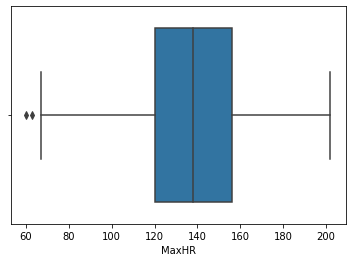

In [ ]:
import seaborn as sns
sns.boxplot(x=data['MaxHR'])

In [ ]:
# handling outlier of MAX_HR
q1 = data['MaxHR'].quantile(0.25)
q3 = data['MaxHR'].quantile(0.75)

iqr = q3-q1
iqr

36.0

In [ ]:
upper_limit =q3 + 1.5 *iqr
lower_limit = q1- 1.5* iqr
upper_limit, lower_limit

(210.0, 66.0)

In [ ]:
#Elimination of outlier
def limit_imputer(value):
	if value > upper_limit:
		return upper_limit
	if value < lower_limit:
		return lower_limit
	else:
		return value

In [ ]:
data['MaxHR'] = data['MaxHR'].apply(limit_imputer)

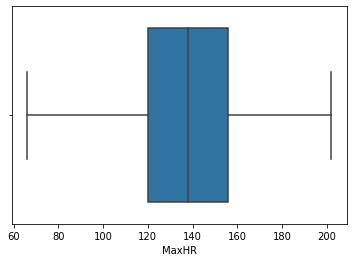

In [ ]:
sns.boxplot(x=data['MaxHR'])

In [ ]:
# using imputing we handled outliers
data['MaxHR'].describe()

count    918.000000
mean     136.819172
std       25.432057
min       66.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

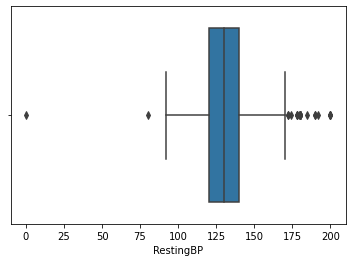

In [ ]:
sns.boxplot(x=data['RestingBP'])

In [ ]:
q1 = data['RestingBP'].quantile(0.25)
q3 = data['RestingBP'].quantile(0.75)

iqr = q3-q1
iqr

20.0

In [ ]:
upper_limit =q3 + 1.5 *iqr
lower_limit = q1- 1.5* iqr
upper_limit, lower_limit

(170.0, 90.0)

In [ ]:
#Elimination of outlier
def limit_imputer(value):
	if value > upper_limit:
		return upper_limit
	if value < lower_limit:
		return lower_limit
	else:
		return value

In [ ]:
data['RestingBP'] = data['RestingBP'].apply(limit_imputer)

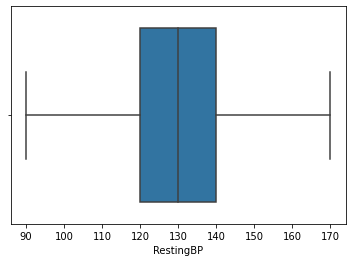

In [ ]:
sns.boxplot(x=data['RestingBP'])

In [ ]:
data['RestingBP'].describe()

count    918.000000
mean     132.125272
std       16.993314
min       90.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      170.000000
Name: RestingBP, dtype: float64

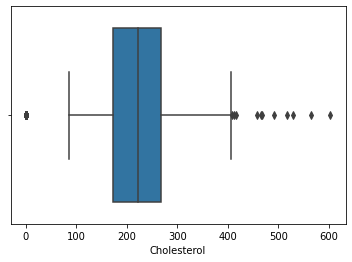

In [ ]:
sns.boxplot(x=data['Cholesterol'])

In [ ]:
q1 = data['Cholesterol'].quantile(0.25)
q3 = data['Cholesterol'].quantile(0.75)

iqr = q3-q1
iqr

93.75

In [ ]:
upper_limit =q3 + 1.5 *iqr
lower_limit = q1- 1.5* iqr
upper_limit, lower_limit

(407.625, 32.625)

In [ ]:
#Elimination of outlier
def limit_imputer(value):
	if value > upper_limit:
		return upper_limit
	if value < lower_limit:
		return lower_limit
	else:
		return value

In [ ]:
data['Cholesterol'] = data['Cholesterol'].apply(limit_imputer)

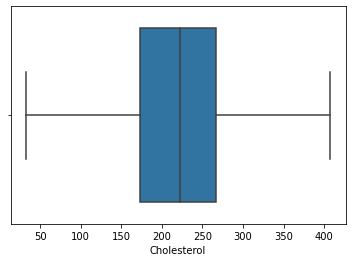

In [ ]:
# graph after removing outliers
sns.boxplot(x=data['Cholesterol'])

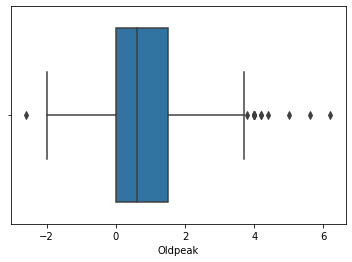

In [ ]:
# graph with outliers
sns.boxplot(x=data['Oldpeak'])

In [ ]:
q1 = data['Oldpeak'].quantile(0.25)
q3 = data['Oldpeak'].quantile(0.75)

iqr = q3-q1
iqr

1.5

In [ ]:
upper_limit =q3 + 1.5 *iqr
lower_limit = q1- 1.5* iqr
upper_limit, lower_limit

(3.75, -2.25)

In [ ]:
#Elimination of outlier
def limit_imputer(value):
	if value > upper_limit:
		return upper_limit
	if value < lower_limit:
		return lower_limit
	else:
		return value

In [ ]:
data['Oldpeak'] = data['Oldpeak'].apply(limit_imputer)

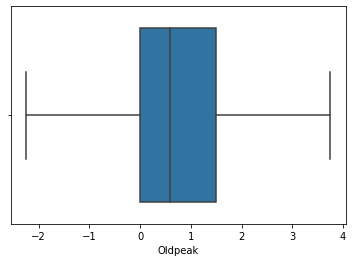

In [ ]:
sns.boxplot(x=data['Oldpeak'])

# **Missing Values**


In [ ]:
# here no missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 86.2+ KB


# **One Hot Encoding**

In [ ]:
# one hot encoding for categorical data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 86.2+ KB


In [ ]:
OneHotEncoding= pd.get_dummies(data, columns=['ChestPainType','Sex','RestingECG','ExerciseAngina','ST_Slope' ], drop_first = True)

In [ ]:
OneHotEncoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    float64
 2   Cholesterol        918 non-null    float64
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    float64
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   ChestPainType_ATA  918 non-null    uint8  
 8   ChestPainType_NAP  918 non-null    uint8  
 9   ChestPainType_TA   918 non-null    uint8  
 10  Sex_M              918 non-null    uint8  
 11  RestingECG_Normal  918 non-null    uint8  
 12  RestingECG_ST      918 non-null    uint8  
 13  ExerciseAngina_Y   918 non-null    uint8  
 14  ST_Slope_Flat      918 non-null    uint8  
 15  ST_Slope_Up        918 non-null    uint8  
dtypes: float64(4), int64(3), u

In [ ]:
OneHotEncoding['HeartDisease'].value_counts()/len(data)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

In [ ]:
X = OneHotEncoding.drop(columns = ['HeartDisease'])
Y = OneHotEncoding['HeartDisease']

In [ ]:
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Sex_M,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172.0,0.0,1,0,0,1,1,0,0,0,1
1,49,160.0,180.0,0,156.0,1.0,0,1,0,0,1,0,0,1,0
2,37,130.0,283.0,0,98.0,0.0,1,0,0,1,0,1,0,0,1
3,48,138.0,214.0,0,108.0,1.5,0,0,0,0,1,0,1,1,0
4,54,150.0,195.0,0,122.0,0.0,0,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132.0,1.2,0,0,1,1,1,0,0,1,0
914,68,144.0,193.0,1,141.0,3.4,0,0,0,1,1,0,0,1,0
915,57,130.0,131.0,0,115.0,1.2,0,0,0,1,1,0,1,1,0
916,57,130.0,236.0,0,174.0,0.0,1,0,0,0,0,0,0,1,0


#**Feature Scaling** 
**Standardisation**

In [ ]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [ ]:
#splitting the dataset
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(scaled_X, Y, train_size = 0.80, stratify = Y, random_state = 101)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((734, 15), (184, 15), (734,), (184,))

# **Model Building** 

# **Logistic Regression**

In [ ]:
from sklearn.ensemble import BaggingClassifier as BC
classifier = BC()
classifier.fit(x_train,y_train)

BaggingClassifier()

In [ ]:
from sklearn.linear_model import LogisticRegression as LR

classifier = BC(base_estimator = LR(),
                n_estimators = 150,
                n_jobs = -1,
                random_state = 42)
classifier.fit(x_train, y_train)
predicted_values = classifier.predict(x_train)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, predicted_values))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       328
           1       0.86      0.90      0.88       406

    accuracy                           0.87       734
   macro avg       0.87      0.86      0.86       734
weighted avg       0.87      0.87      0.87       734



# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
classifier = RFC()
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
predicted_values = classifier.predict(x_train)
print(classification_report(y_train, predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       328
           1       1.00      1.00      1.00       406

    accuracy                           1.00       734
   macro avg       1.00      1.00      1.00       734
weighted avg       1.00      1.00      1.00       734



In [ ]:
predicted_values = classifier.predict(x_test)
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90        82
           1       0.92      0.91      0.92       102

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184



# **Decision Tree**

In [ ]:
y_train

88     1
204    0
83     0
811    0
6      0
      ..
383    1
820    0
915    1
519    1
770    0
Name: HeartDisease, Length: 734, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier = DTC( class_weight = 'balanced')
#classifier = DTC()

In [ ]:
classifier.fit(x_train, y_train)
predicted_values = classifier.predict(x_train)

In [ ]:
predicted_values[:30]

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       328
           1       1.00      1.00      1.00       406

    accuracy                           1.00       734
   macro avg       1.00      1.00      1.00       734
weighted avg       1.00      1.00      1.00       734



In [ ]:
predicted_values = classifier.predict(x_test)
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77        82
           1       0.82      0.79      0.81       102

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.79      0.79      0.79       184



# **PCA**

In [ ]:
data.keys()

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
OneHotEncoding

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Sex_M,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172.0,0.0,0,1,0,0,1,1,0,0,0,1
1,49,160.0,180.0,0,156.0,1.0,1,0,1,0,0,1,0,0,1,0
2,37,130.0,283.0,0,98.0,0.0,0,1,0,0,1,0,1,0,0,1
3,48,138.0,214.0,0,108.0,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150.0,195.0,0,122.0,0.0,0,0,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132.0,1.2,1,0,0,1,1,1,0,0,1,0
914,68,144.0,193.0,1,141.0,3.4,1,0,0,0,1,1,0,0,1,0
915,57,130.0,131.0,0,115.0,1.2,1,0,0,0,1,1,0,1,1,0
916,57,130.0,236.0,0,174.0,0.0,1,1,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.decomposition import PCA

pca=PCA(0.95)
X_pca=pca.fit_transform(X)
X_pca.shape

(918, 2)

In [ ]:
pca.explained_variance_ratio_

array([0.90361882, 0.06218932])

In [ ]:
pca.n_components_

2

In [ ]:
X_pca

array([[ 87.40458319, -29.53254211],
       [-22.08959767, -15.52142687],
       [ 76.38026045,  39.17386311],
       ...,
       [-74.32066163,  16.76361798],
       [ 34.31567426, -33.74778264],
       [-26.27629483, -38.24707353]])

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = tts(X_pca, Y, train_size = 0.2, stratify = Y, random_state = 30)

Accuracy goes down

In [ ]:
from sklearn.linear_model import LogisticRegression

model =LogisticRegression(max_iter=1000)
model.fit(X_train_pca,y_train)
model.score(X_test_pca,y_test)

0.689795918367347